<a href="https://colab.research.google.com/github/MozammilAnsari/Credit-Card-Default-Prediction/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime
 
import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load the dataset
df=pd.read_excel('/content/drive/MyDrive/Online Retail.xlsx')

In [ ]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [ ]:
df.sample(60)

InvoiceNo StockCode                          Description  Quantity  \
143166    548666     22715                     CARD WEDDING DAY        12   
12786     537396     22941         CHRISTMAS LIGHTS 10 REINDEER         1   
31646     539002     71477    COLOUR GLASS. STAR T-LIGHT HOLDER         3   
439328    574445     21908        CHOCOLATE THIS WAY METAL SIGN        12   
529577    580735     22751       FELTCRAFT PRINCESS OLIVIA DOLL         4   
34651     539415     22617           BAKING SET SPACEBOY DESIGN        12   
402093    571465     21707  FOLDING UMBRELLA BLACKBLUE POLKADOT         3   
526715    580676     23293    SET OF 12 FAIRY CAKE BAKING CASES         1   
301722    563352     21888                            BINGO SET         4   
284826    561889     21578     WOODLAND DESIGN  COTTON TOTE BAG         6   
252558    559128     22555            PLASTERS IN TIN STRONGMAN         3   
116922    546310     48185                   DOORMAT FAIRY CAKE        10   
440437    574532     23460                SWEETHEART WALL TIDY          2   
452151    575324     22600        CHRISTMAS RETROSPOT STAR WOOD        12   
20706     538071     20725              LUNCH BAG RED RETROSPOT         2   
110980    545705     22698       PINK REGENCY TEACUP AND SAUCER         6   
203597    554526     22090              PAPER BUNTING RETROSPOT         1   
96296     544484     21903                   MAN FLU METAL SIGN        12   
396691    571082     23356                LOVE HOT WATER BOTTLE         1   
393497   C570828     90169                      DAISY HAIR COMB        -6   
305248    563661     23205      CHARLOTTE BAG VINTAGE ALPHABET         10   
125008    547004     21043          APRON MODERN VINTAGE COTTON        12   
57831     541219     20966                 SANDWICH BATH SPONGE         1   
360869    568316     84987      SET OF 36 TEATIME PAPER DOILIES         1   
388681    570448    85049A        TRADITIONAL CHRISTMAS RIBBONS         3   
469473    576593     23350              ROLL WRAP VINTAGE SPOT          2   
447629    574956     23526                 DOG LICENCE WALL ART         4   
230217    557129     22553               PLASTERS IN TIN SKULLS         4   
80180     543022     21259          VICTORIAN SEWING BOX SMALL          2   
271742    560716     22993         SET OF 4 PANTRY JELLY MOULDS        12   
104993    545216     21733     RED HANGING HEART T-LIGHT HOLDER         1   
64740     541664     22975           SPACEBOY CHILDRENS EGG CUP        24   
336915    566408     23267        SET OF 4 SANTA PLACE SETTINGS         3   
460902    575930     22592        CARDHOLDER HOLLY WREATH METAL         5   
282749    561658     20679                EDWARDIAN PARASOL RED         1   
252977    559150     21260                        FIRST AID TIN         6   
451598    575218     22835      HOT WATER BOTTLE I AM SO POORLY         8   
68256     541856     21907            I'M ON HOLIDAY METAL SIGN         2   
28172     538629     22934   BAKING MOULD EASTER EGG WHITE CHOC         2   
350115    567613     22739    RIBBON REEL CHRISTMAS SOCK BAUBLE        10   
95437     544457     21931               JUMBO STORAGE BAG SUKI        10   
392924    570754     23146       TRIPLE HOOK ANTIQUE IVORY ROSE         4   
29937     538832     84950       ASSORTED COLOUR T-LIGHT HOLDER        12   
196243    553833     20717               STRAWBERRY SHOPPER BAG         4   
400099    571296     22560           TRADITIONAL MODELLING CLAY         1   
462631    575985     22395          PAPERWEIGHT VINTAGE PAISLEY         1   
246834    558731     21930             JUMBO STORAGE BAG SKULLS        10   
468015    576385     21770               OPEN CLOSED METAL SIGN         7   
433479    573923     23555         LANDMARK FRAME NOTTING HILL          1   
316116    564747     23548                   WRAP MAGIC FOREST         25   
451134    575179     22158   3 HEARTS HANGING DECORATION RUSTIC         8   
147

In [ ]:
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.shape

(541909, 8)

### **Shape of our dataset is (541909, 8) that means we have 541909 number of rows and 8 columns**

In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# Missing Values percentage contribution in Dataframe
 
df_null = round(100*(df.isnull().sum())/len(df), 2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

Text(0.5, 1.0, 'Ratio of missing values per columns')

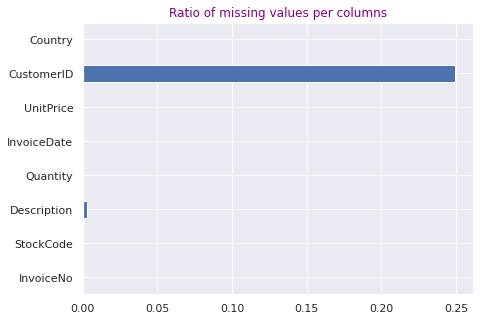

In [ ]:
 #plot of NaN values in dataset
plt.figure(figsize=(7, 5))
df.isnull().mean(axis=0).plot.barh()
plt.title("Ratio of missing values per columns",color = 'Purple')

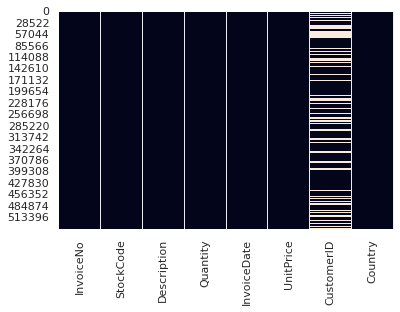

In [ ]:
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

### **Here, we can see that there are some missing value present in our dataset like in CustomerID and Description**

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(406829, 8)

### After droping the null value rows the shape of our data set becomes 406829 rows and 8 columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [ ]:
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [ ]:

df=df[~df['InvoiceNo'].str.contains('C')]

In [ ]:
df['InvoiceNo']

0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
541904    581587
541905    581587
541906    581587
541907    581587
541908    581587
Name: InvoiceNo, Length: 397924, dtype: object

### we have to drop some InvoiceNo which are starts with 'c' because 'c', it indicates a cancellation

In [ ]:
df.shape

(541909, 8)

### After droping the the data in InvoiceNo column which start with c the shape of new data is 397924 rows and 8 columns

In [ ]:
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

# **Exploratory Data Analysis**

In [ ]:
Description_df=df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index': 'Description_Name'}, inplace=True)
Description_df.rename(columns={'Description': 'Count'}, inplace=True)
Description_df.head()

Description_Name  Count
0  WHITE HANGING HEART T-LIGHT HOLDER   2369
1            REGENCY CAKESTAND 3 TIER   2200
2             JUMBO BAG RED RETROSPOT   2159
3                       PARTY BUNTING   1727
4             LUNCH BAG RED RETROSPOT   1638

In [ ]:

Description_df.tail()

Description_Name  Count
4218                              Missing      1
4219  historic computer difference?....se      1
4220       DUSTY PINK CHRISTMAS TREE 30CM      1
4221            WRAP BLUE RUSSIAN FOLKART      1
4222       PINK BERTIE MOBILE PHONE CHARM      1

In [ ]:
Description_df.shape

(4223, 2)

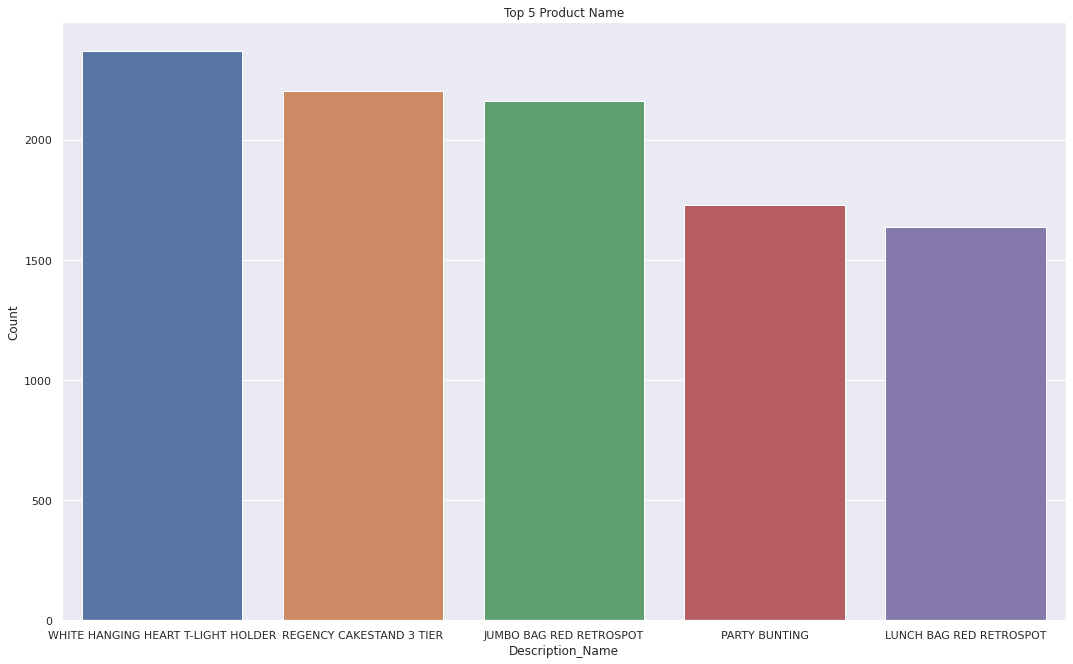

In [ ]:
plt.figure(figsize=(18,11))
plt.title('Top 5 Product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[:5])

### **Top product based on maximum selling are :**


1.   WHITE HANGING HEART T-LIGHT HOLDER
2.   REGENCY CAKESTAND 3 TIER
3.   JUMBO BAG RED RETROSPOT
4.   PARTY BUNTING
5.   LUNCH BAG RED RETROSPOT









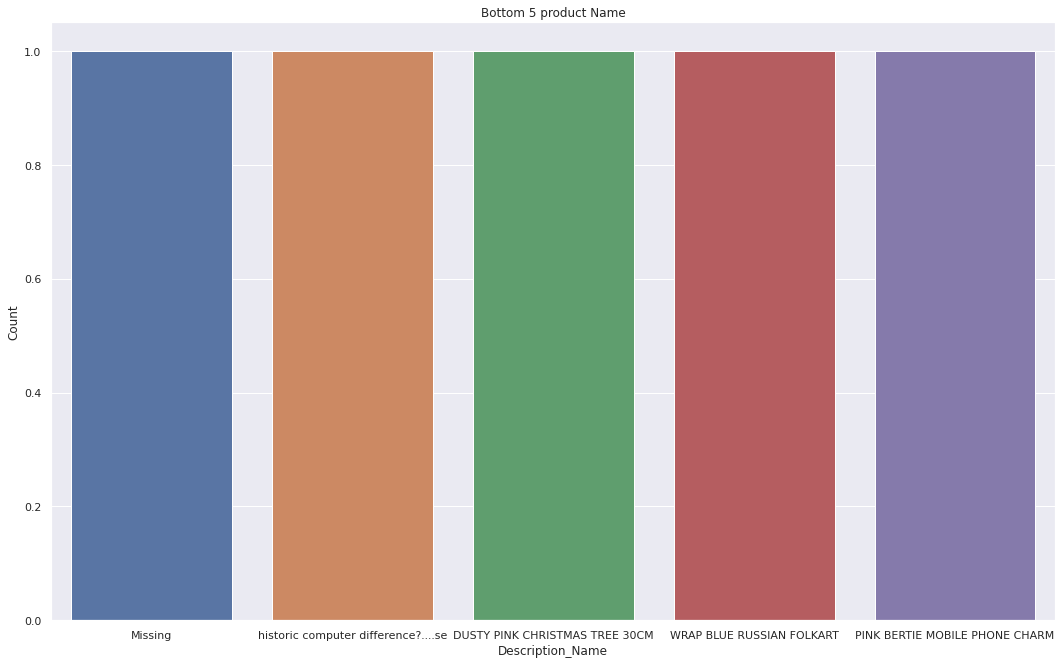

In [ ]:
plt.figure(figsize=(18,11))
plt.title('Bottom 5 product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[-5:])

### Bottom 5 Product based on the selling are:
1.   LIGHT DECORATION BATTERY OPERATED 
2.   Water damaged 
3.   throw away    
4.   re dotcom quick fix.  
5.   BIRTHDAY BANNER TAPE

In [ ]:
StockCode_df=df['StockCode'].value_counts().reset_index()
StockCode_df.rename(columns={'index': 'StockCode_Name'}, inplace=True)
StockCode_df.rename(columns={'StockCode': 'Count'}, inplace=True)
StockCode_df.head()

StockCode_Name  Count
0         85123A   2313
1          22423   2203
2         85099B   2159
3          47566   1727
4          20725   1639

In [ ]:
StockCode_df.tail()

StockCode_Name  Count
4065          21431      1
4066          22275      1
4067          17001      1
4068         90187A      1
4069          72759      1

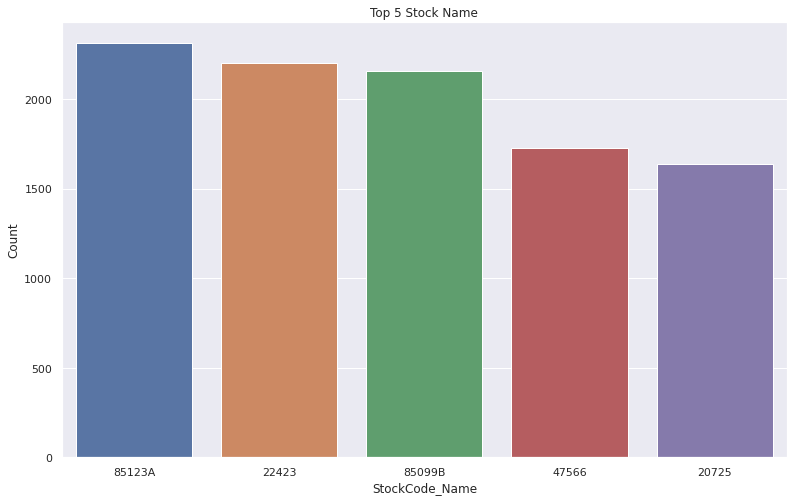

In [ ]:
plt.figure(figsize=(13,8))
plt.title('Top 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=StockCode_df[:5])

### **Top 5 Stock name based on selling are :**
1.   85123A
2.   22423
3.   85099B    
4.   47566
5.   20725

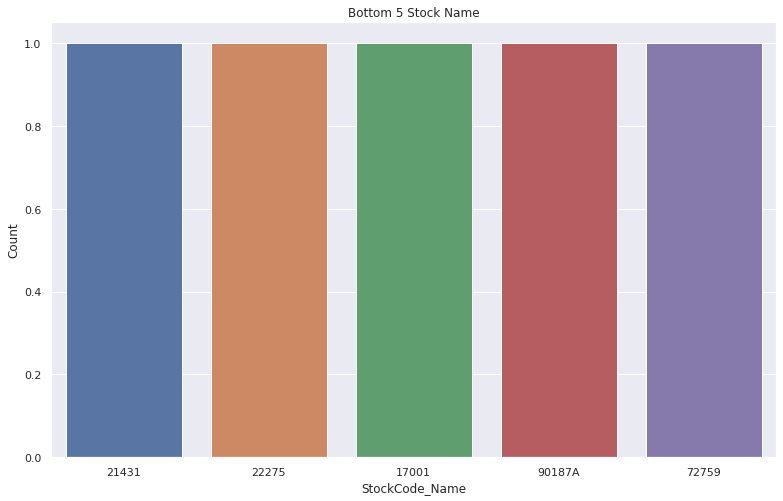

In [ ]:
plt.figure(figsize=(13,8))
plt.title('Bottom 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=StockCode_df[-5:])

In [ ]:
country_df=df['Country'].value_counts().reset_index()
country_df.rename(columns={'index': 'Country_Name'}, inplace=True)
country_df.rename(columns={'Country': 'Count'}, inplace=True)
country_df.head()

Country_Name   Count
0  United Kingdom  495478
1         Germany    9495
2          France    8557
3            EIRE    8196
4           Spain    2533

In [ ]:
country_df.tail()

Country_Name  Count
33       Lithuania     35
34          Brazil     32
35  Czech Republic     30
36         Bahrain     19
37    Saudi Arabia     10

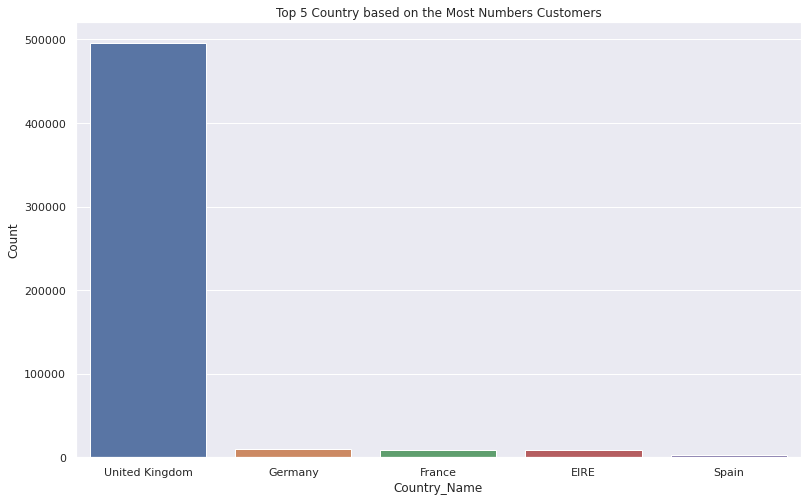

In [ ]:
plt.figure(figsize=(13,8))
plt.title('Top 5 Country based on the Most Numbers Customers')
sns.barplot(x='Country_Name',y='Count',data=country_df[:5])

### **From this graph we can see that most of the customers are from United Kingdom ,Germany ,France ,EIRE and Spain**

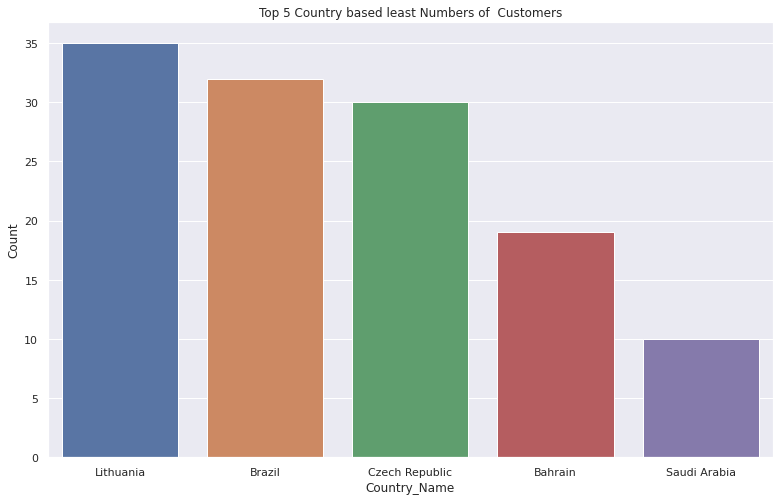

In [ ]:
plt.figure(figsize=(13,8))
plt.title('Top 5 Country based least Numbers of  Customers')
sns.barplot(x='Country_Name',y='Count',data=country_df[-5:])

### From this graph we can see that least number of customers from Lithuania,Brazil, Czech Republic ,Bahrain and Saudi Arabia

In [ ]:
df[df['Country']=='Saudi Arabia']

InvoiceNo StockCode                        Description  Quantity  \
100810    544838     22915      ASSORTED BOTTLE TOP  MAGNETS         12   
100811    544838     22363               GLASS JAR MARMALADE          6   
100812    544838     22362       GLASS JAR PEACOCK BATH SALTS         6   
100813    544838     22361  GLASS JAR DAISY FRESH COTTON WOOL         6   
100814    544838     22553             PLASTERS IN TIN SKULLS        12   
100815    544838     22555          PLASTERS IN TIN STRONGMAN        12   
100816    544838     22556     PLASTERS IN TIN CIRCUS PARADE         12   
100817    544838     20781           GOLD EAR MUFF HEADPHONES         2   
100818    544838     22969       HOMEMADE JAM SCENTED CANDLES        12   
108127   C545507     22361  GLASS JAR DAISY FRESH COTTON WOOL        -5   

               InvoiceDate  UnitPrice  CustomerID       Country  
100810 2011-02-24 10:34:00       0.42     12565.0  Saudi Arabia  
100811 2011-02-24 10:34:00       2.95     12565.0  Saudi Arabia  
100812 2011-02-24 10:34:00       2.95     12565.0  Saudi Arabia  
100813 2011-02-24 10:34:00       2.95     12565.0  Saudi Arabia  
100814 2011-02-24 10:34:00       1.65     12565.0  Saudi Arabia  
100815 2011-02-24 10:34:00       1.65     12565.0  Saudi Arabia  
100816 2011-02-24 10:34:00       1.65     12565.0  Saudi Arabia  
100817 2011-02-24 10:34:00       5.49     12565.0  Saudi Arabia  
100818 2011-02-24 10:34:00       1.45     12565.0  Saudi Arabia  
108127 2011-03-03 11:43:00       2.95     12565.0  Saudi Arabia

### **1. Positively skewed (or right-skewed) distribution is a type of distribution in which most values are clustered around the left tail of the distribution while the right tail of the distribution is longer.hear mean>median>mode**
### **2. Negatively skewed (also known as left-skewed) distribution is a type of distribution in which more values are concentrated on the right side (tail) of the distribution graph while the left tail of the distribution graph is longer.hear mean<median<mode**
**3. For symmetric graph mean=median=mode**

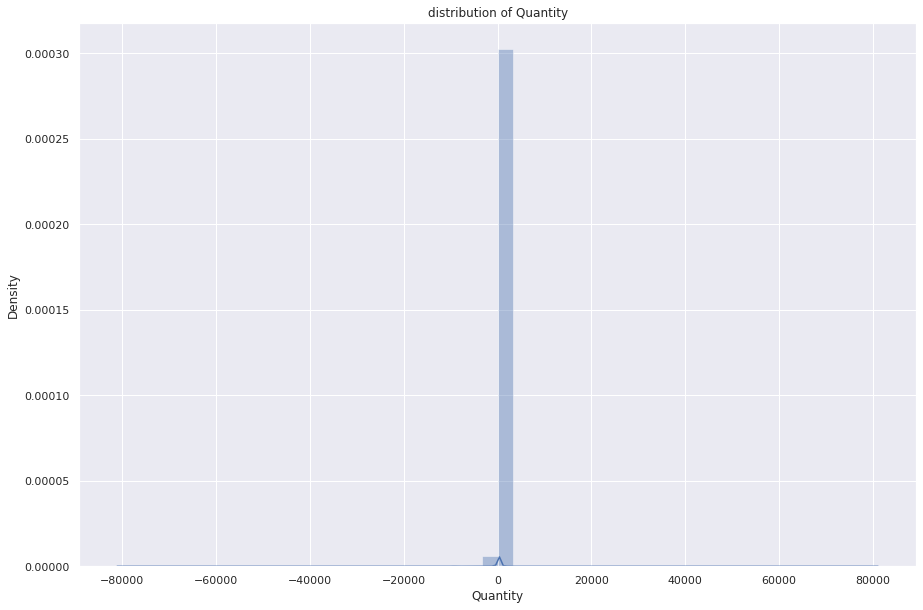

In [ ]:
#distribution of Quantity
plt.figure(figsize=(15,10))
plt.title('distribution of Quantity')
sns.distplot(df['Quantity'],color="B")

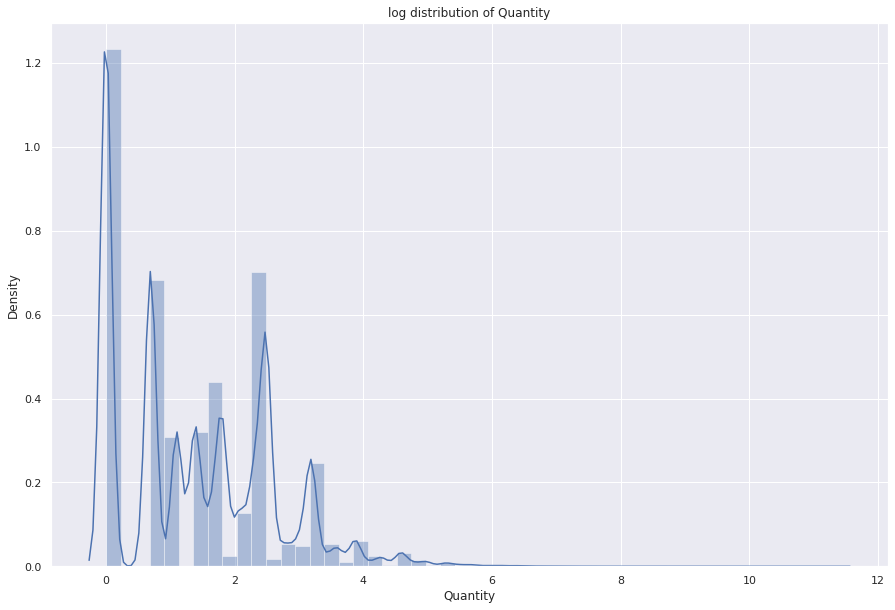

In [ ]:
plt.figure(figsize=(15,10))
plt.title('log distribution of Quantity')
sns.distplot(np.log(df['Quantity']),color="B")

In [ ]:
df['Quantity'].unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     56,     72,    200,
          600,    480,     -6,     14,     -2,     11,     33,     13,
           -4,     -5,     -7,     -3,     70,    252,     60,    216,
          384,    -10,     27,     15,     22,     19,     17,     21,
           34,     47,    108,     52,  -9360,    -38,     75,    270,
           42,    240,     90,    320,   1824,    204,     69,    -36,
         -192,   -144,    160,   2880,   1400,     39,    -48,    -50,
           26,   1440,     31,     82,     78,     97,     98,     35,
           57,    -20,    110,    -22,    -30,    -70,   -130,    -80,
         -120,    -40,    -25,    -14,    -15,    -69,   -140,   -320,
      

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


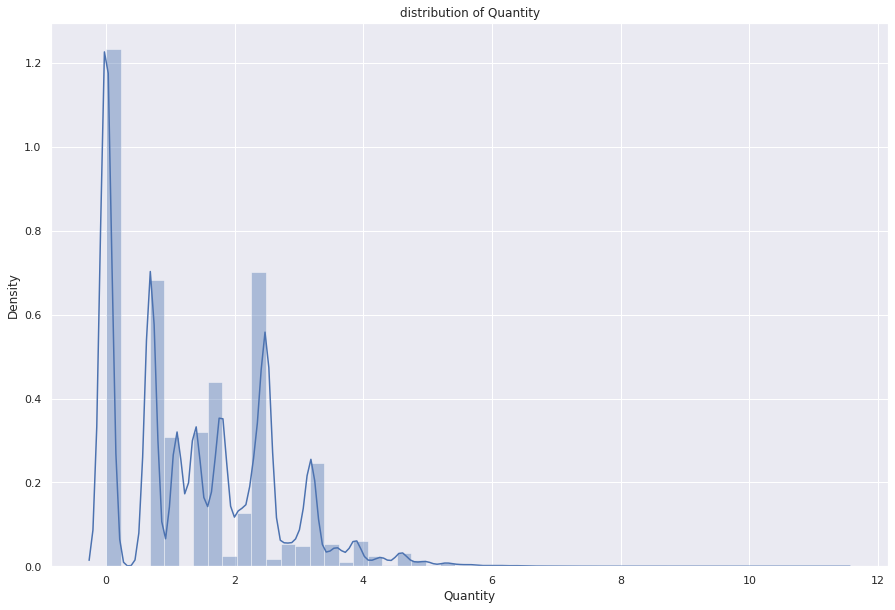

In [ ]:
plt.figure(figsize=(15,10))
plt.title('distribution of Quantity')
sns.distplot(np.log(df['Quantity']),color="B")

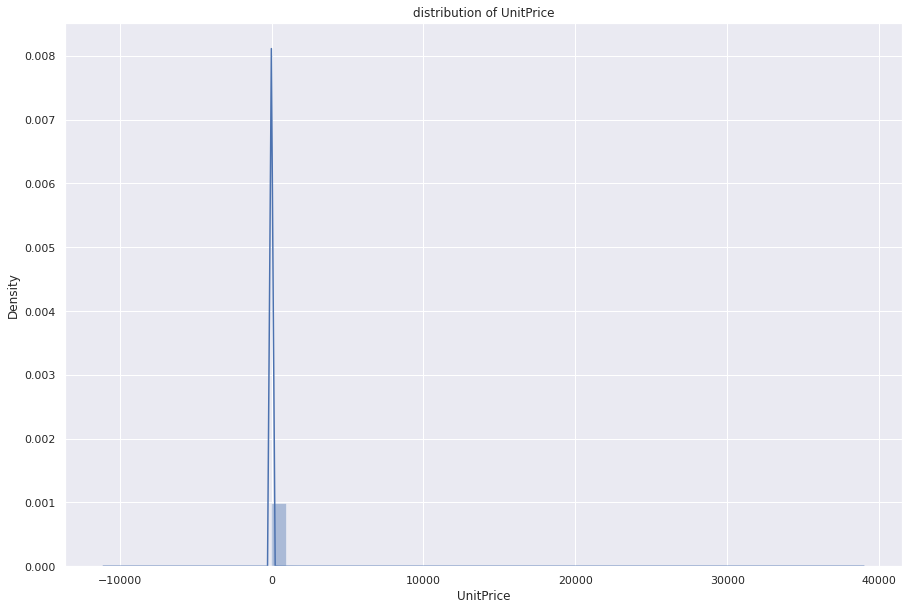

In [ ]:
plt.figure(figsize=(15,10))
plt.title('distribution of UnitPrice')
sns.distplot(df['UnitPrice'],color="B")

In [ ]:
df[df['UnitPrice']<0]

InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
299983   A563186         B  Adjust bad debt         1 2011-08-12 14:51:00   
299984   A563187         B  Adjust bad debt         1 2011-08-12 14:52:00   

        UnitPrice  CustomerID         Country  
299983  -11062.06         NaN  United Kingdom  
299984  -11062.06         NaN  United Kingdom

In [ ]:
df=df[df['UnitPrice']>0]

In [ ]:
df.head(5)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

# **Feature engineering**

In [ ]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

## Convert  InvoiceDate columns into date time formate

In [ ]:
df['Day']=df['InvoiceDate'].dt.day_name()

## Create a new features Day from Invoicedate

In [ ]:
df["year"] = df["InvoiceDate"].apply(lambda x: x.year)
df["month_num"] = df["InvoiceDate"].apply(lambda x: x.month)
df["day_num"] = df["InvoiceDate"].apply(lambda x: x.day)
df["hour"] = df["InvoiceDate"].apply(lambda x: x.hour)
df["minute"] = df["InvoiceDate"].apply(lambda x: x.minute)

In [ ]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country        Day  year  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  Wednesday  2010   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday  2010   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  Wednesday  2010   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday  2010   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday  2010   

   month_num  day_num  hour  minute  
0         12        1     8      26  
1         12        1     8      26  
2         12        1     8      26  
3         12        1     8      26  
4         12        1     8      26

# Create some new features from Invoicedate like hours,year,month_num,day_num

In [ ]:
df['TotalAmount']=df['Quantity']*df['UnitPrice']


## Create a new features TotalAmount from product of Quantity and Unitprice

In [ ]:
df['Month']=df['InvoiceDate'].dt.month_name()

In [ ]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country        Day  year  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  Wednesday  2010   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday  2010   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  Wednesday  2010   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday  2010   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday  2010   

   month_num  day_num  hour  minute  TotalAmount     Month  
0         12        1     8      26        15.30  December  
1         12        1     8      26        20.34  December  
2         12        1     8      26        22.00  December  
3         12        1     8      26        20.34  December  
4         12        1     8      26        20.34  December

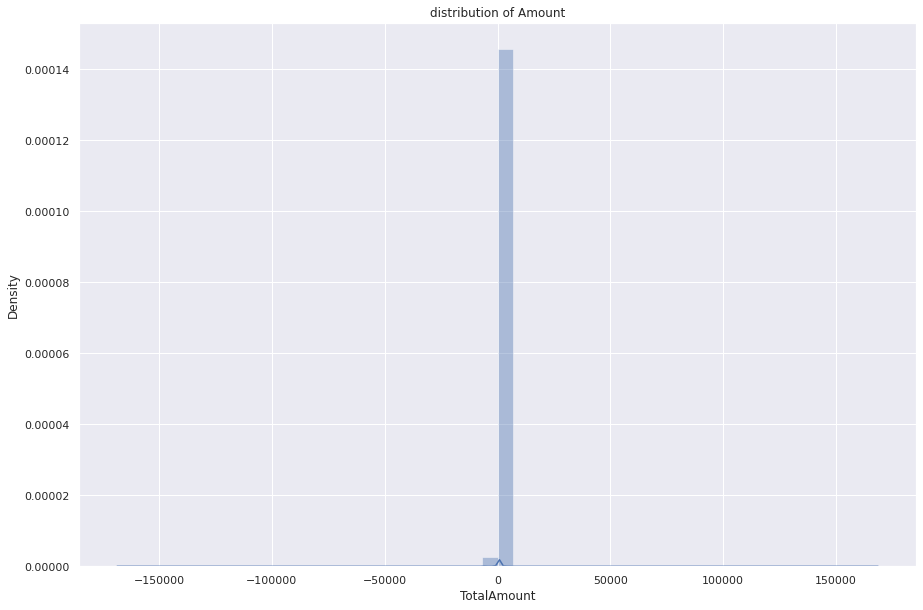

In [ ]:
plt.figure(figsize=(15,10))
plt.title('distribution of Amount')
sns.distplot(df['TotalAmount'],color="B")

In [ ]:
df['TotalAmount'].describe()

count    539392.000000
mean         18.112749
std         379.091706
min     -168469.600000
25%           3.750000
50%           9.840000
75%          17.400000
max      168469.600000
Name: TotalAmount, dtype: float64

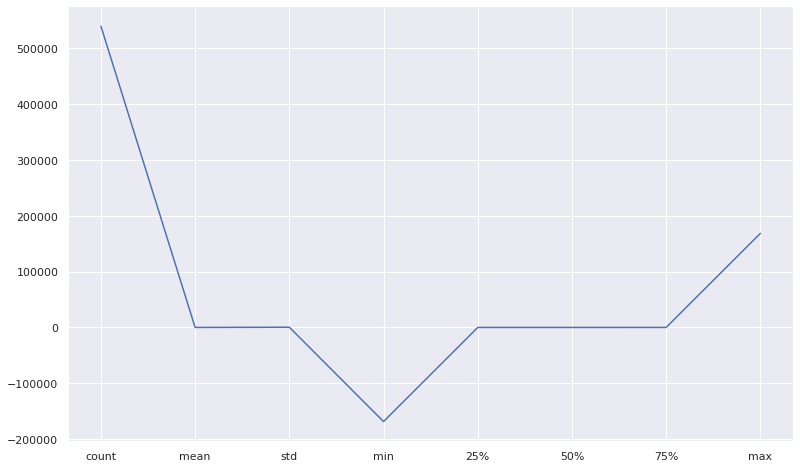

In [ ]:
plt.figure(figsize=(13,8))
df['TotalAmount'].describe().plot()

In [ ]:
day_df=df['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)
day_df.rename(columns={'Day': 'Count'}, inplace=True)
day_df


Day_Name   Count
0   Thursday  103362
1    Tuesday  101208
2     Monday   94756
3  Wednesday   94044
4     Friday   81652
5     Sunday   64370

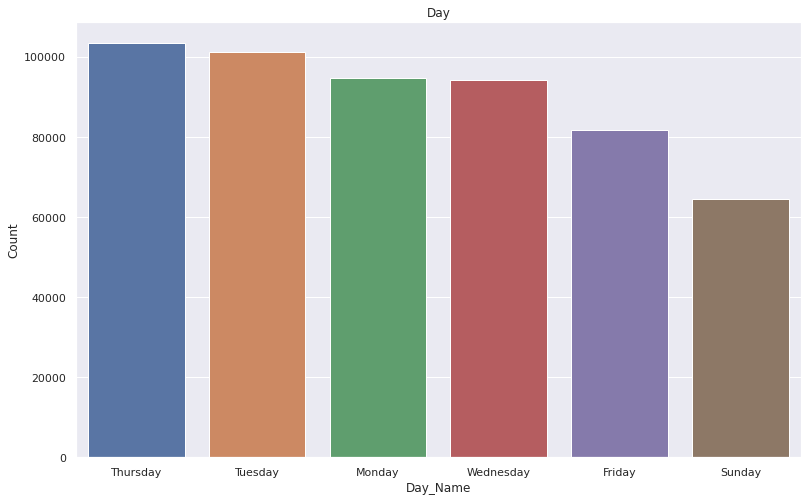

In [ ]:
plt.figure(figsize=(13,8))
plt.title('Day')
sns.barplot(x='Day_Name',y='Count',data=day_df)


## Most of the customers have purches the items in Thursday ,Wednesday and Tuesday

In [ ]:
month_df=df['Month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'Month': 'Count'}, inplace=True)
month_df


Month_Name  Count
0    November  84445
1    December  67679
2     October  60504
3   September  50066
4        July  39330
5         May  36785
6        June  36688
7       March  36502
8      August  35151
9     January  35007
10      April  29655
11   February  27580

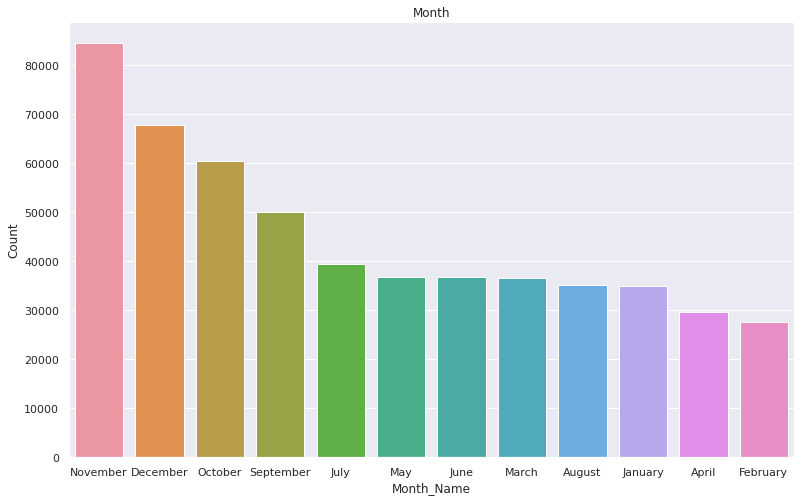

In [ ]:
plt.figure(figsize=(13,8))
plt.title('Month')
sns.barplot(x='Month_Name',y='Count',data=month_df)

# most numbers of customers have purches the gifts in the month of November ,October and December September

less numbers of customers have purches the gifts in the month of April ,january and February

In [ ]:
hour_df=df['hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hour_Name'}, inplace=True)
hour_df.rename(columns={'hour': 'Count'}, inplace=True)
hour_df

Hour_Name  Count
0          12  78458
1          15  77139
2          13  72064
3          14  66960
4          11  57332
5          16  54288
6          10  48831
7           9  34226
8          17  28274
9           8   8902
10         18   7919
11         19   3704
12         20    871
13          7    383
14          6     41

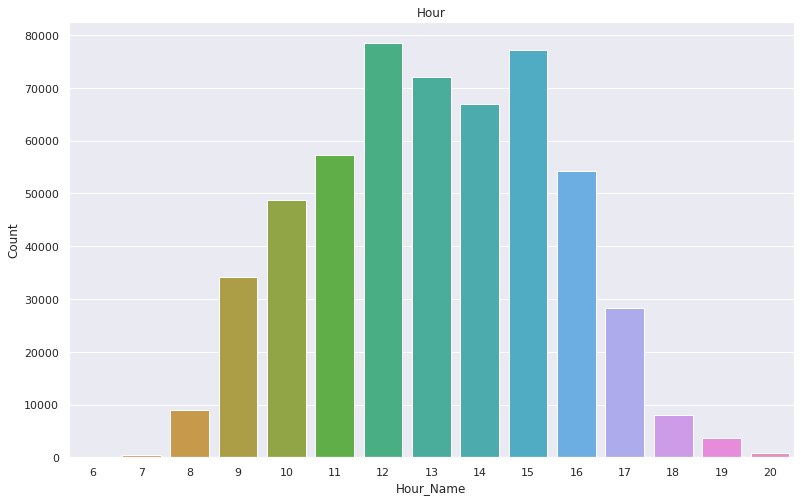

In [ ]:
plt.figure(figsize=(13,8))
plt.title('Hour')
sns.barplot(x='Hour_Name',y='Count',data=hour_df)

## From this graph we can see that in Afternoon Time most of the customers have purches the item.

In [ ]:
def time_type(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'

In [ ]:
df['Time_type']=df['hour'].apply(time_type)

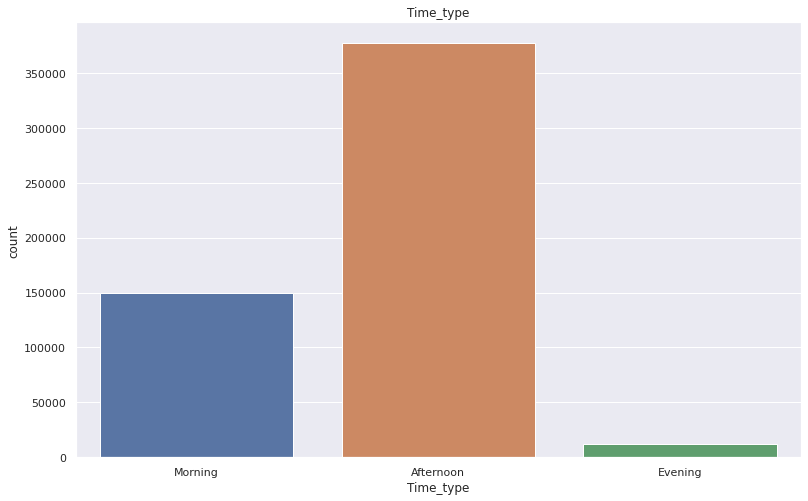

In [ ]:
plt.figure(figsize=(13,8))
plt.title('Time_type')
sns.countplot(x='Time_type',data=df)


## Most of the customers have purches the items in Aftrnoon ,moderate numbers of customers have purches the items in Morning and least numbers of customers have purches the items in Evening

In [ ]:
df.head(8)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   

          InvoiceDate  UnitPrice  CustomerID         Country        Day  year  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  Wednesday  2010   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday  2010   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  Wednesday  2010   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday  2010   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday  2010   
5 2010-12-01 08:26:00       7.65     17850.0  United Kingdom  Wednesday  2010   
6 2010-12-01 08:26:00       4.25     17850.0  United Kingdom  Wednesday  2010   
7 2010-12-01 08:28:00       1.85     17850.0  United Kingdom  Wednesday  2010   

   month_num  day_num  hour  minute  TotalAmount     Month Time_type  
0         12        1     8      26        15.30  December   Morning  
1         12        1     8      26        20.34  December   Morning  
2         12        1     8      26        22.00  December   Morning  
3         12        1     8      26        20.34  December   Morning  
4         12        1     8      26        20.34  December   Morning  
5         12        1     8      26        15.30  December   Morning  
6         12        1     8      26        25.50  December   Morning  
7         12        1     8      28        11.10  December   Morning

# **Create the RFM model (Recency, Frequency,Monetary value)**

## Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors: . Frequency: How often a customer makes a purchase. Monetary Value: How much money a customer spends on

## Performing RFM Segmentation and RFM Analysis, Step by Step

The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer. ... The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M), using Excel or another tool.

### Calculating RFM scores
The number is typically 3 or 5. If you decide to code each RFM attribute into 3 categories, you'll end up with 27 different coding combinations ranging from a high of 333 to a low of 111. Generally speaking, the higher the RFM score, the more valuable the customer.

In [ ]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer
import datetime as dt
 
#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)
 
#Create RFM Modelling scores for each customer
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})
 
#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)
 
#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)
 
rfm_df.reset_index().head()

CustomerID  Recency  Frequency  Monetary
0     12346.0      325          2      0.00
1     12347.0        2        182   4310.00
2     12348.0       75         31   1797.24
3     12349.0       18         73   1757.55
4     12350.0      310         17    334.40

In [ ]:
#Descriptive Statistics (Recency)
rfm_df.Recency.describe()


count    4371.000000
mean       91.598948
std       100.776834
min         0.000000
25%        16.000000
50%        50.000000
75%       143.000000
max       373.000000
Name: Recency, dtype: float64

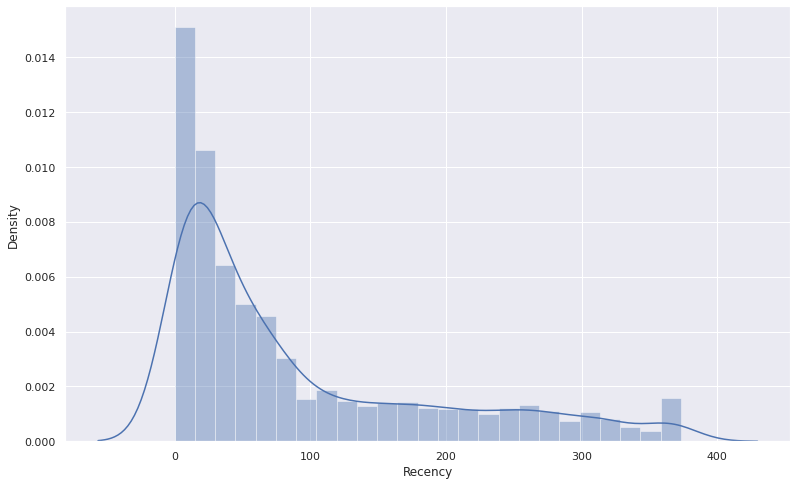

In [ ]:
#Recency distribution plot
import seaborn as sns
x = rfm_df['Recency']
plt.figure(figsize=(13,8))
sns.distplot(x)

In [ ]:
#Descriptive Statistics (Frequency)
rfm_df.Frequency.describe()

count    4371.000000
mean       93.065431
std       232.463777
min         1.000000
25%        17.000000
50%        42.000000
75%       102.000000
max      7983.000000
Name: Frequency, dtype: float64

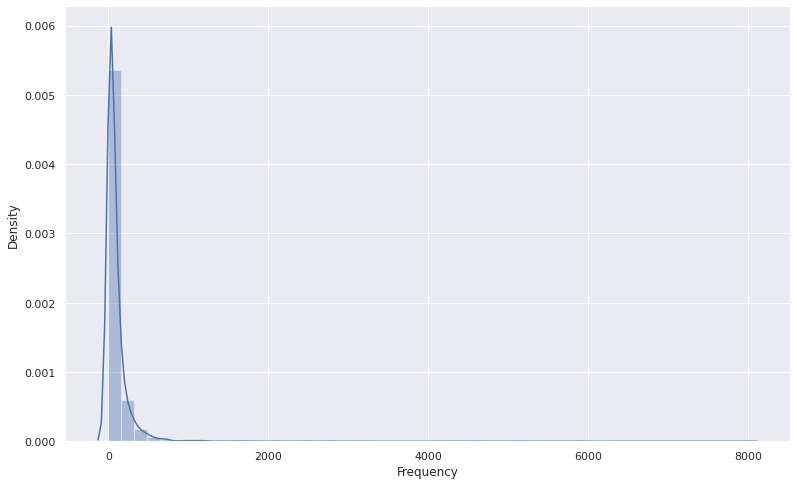

In [ ]:
#Frequency distribution plot, taking observations which have frequency less than 1000
import seaborn as sns
x = rfm_df['Frequency']
plt.figure(figsize=(13,8))
sns.distplot(x)

In [ ]:
#Descriptive Statistics (Monetary)
rfm_df.Monetary.describe()

count      4371.000000
mean       1898.894032
std        8220.235339
min       -4287.630000
25%         293.785000
50%         648.410000
75%        1611.860000
max      279489.020000
Name: Monetary, dtype: float64

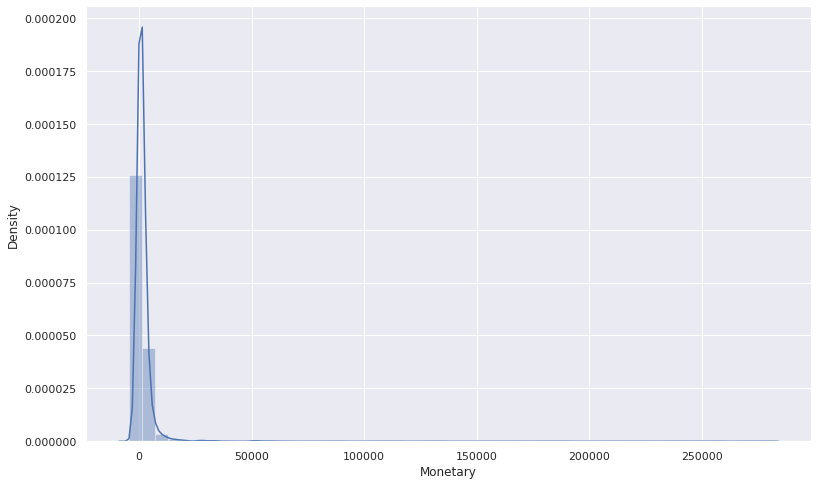

In [ ]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
import seaborn as sns
x = rfm_df['Monetary']
plt.figure(figsize=(13,8))
sns.distplot(x)

# **Split into four segments using quantiles**

In [ ]:
#Split into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [ ]:
quantiles

{'Recency': {0.25: 16.0, 0.5: 50.0, 0.75: 143.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 102.0},
 'Monetary': {0.25: 293.78499999999997, 0.5: 648.41, 0.75: 1611.86}}

In [ ]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

Recency  Frequency  Monetary  R  F  M
CustomerID                                       
12346.0         325          2      0.00  4  4  4
12347.0           2        182   4310.00  1  1  1
12348.0          75         31   1797.24  3  3  1
12349.0          18         73   1757.55  2  2  1
12350.0         310         17    334.40  4  4  3

In [ ]:
 
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)
 
#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore
CustomerID                                                          
12346.0         325          2      0.00  4  4  4      444        12
12347.0           2        182   4310.00  1  1  1      111         3
12348.0          75         31   1797.24  3  3  1      331         7
12349.0          18         73   1757.55  2  2  1      221         5
12350.0         310         17    334.40  4  4  3      443        11

In [ ]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]
 
#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

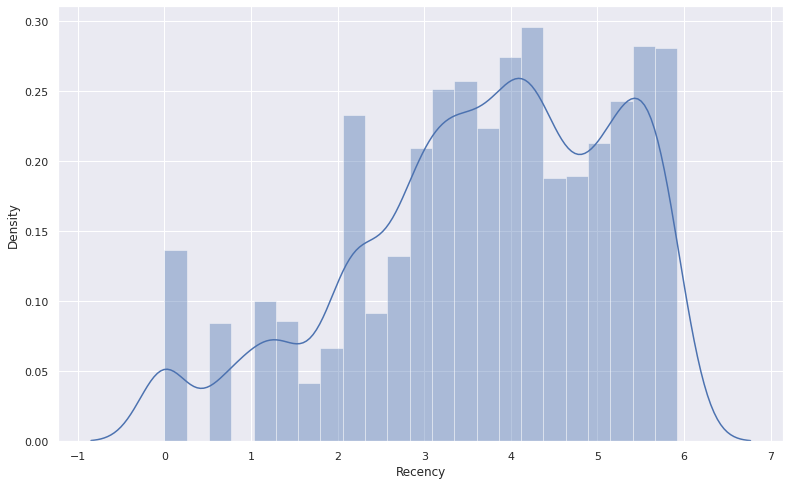

In [ ]:
 
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(13,8))
sns.distplot(Recency_Plot)

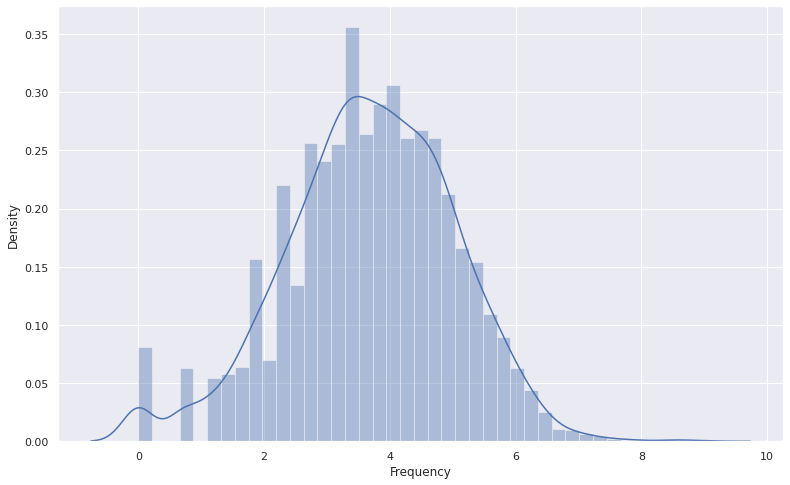

In [ ]:
 
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(13,8))
sns.distplot(Frequency_Plot)

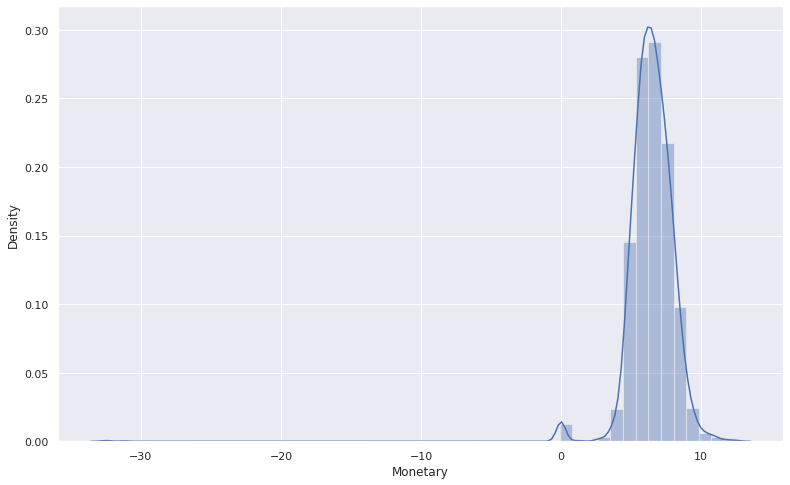

In [ ]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(13,8))
sns.distplot(Monetary_Plot)

In [ ]:
from sklearn import preprocessing
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

# **K-Means Clustering**
# Applying Silhouette Score Method on Recency and Monetary

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_
 
    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4249147841945275
For n_clusters = 3, silhouette score is 0.43076644541027936
For n_clusters = 4, silhouette score is 0.36295953930186603
For n_clusters = 5, silhouette score is 0.37640034476717543
For n_clusters = 6, silhouette score is 0.3838775577996334
For n_clusters = 7, silhouette score is 0.373859340605756
For n_clusters = 8, silhouette score is 0.37251028014895876
For n_clusters = 9, silhouette score is 0.36335335859749374
For n_clusters = 10, silhouette score is 0.3465791142643101
For n_clusters = 11, silhouette score is 0.3518173406638026
For n_clusters = 12, silhouette score is 0.34474098435063355
For n_clusters = 13, silhouette score is 0.3489836186689755
For n_clusters = 14, silhouette score is 0.3477660219630249
For n_clusters = 15, silhouette score is 0.34398237599823495


# **Calculation of Silhouette score**

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:

### Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a.

### Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.

## **Applying Elbow Method on Recency and Monetary**

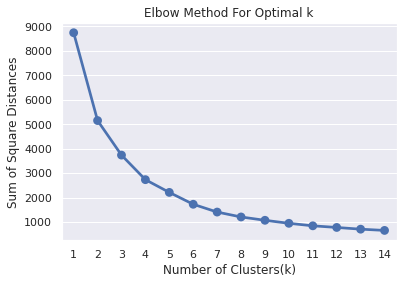

In [ ]:
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
 
from sklearn.cluster import KMeans
 
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

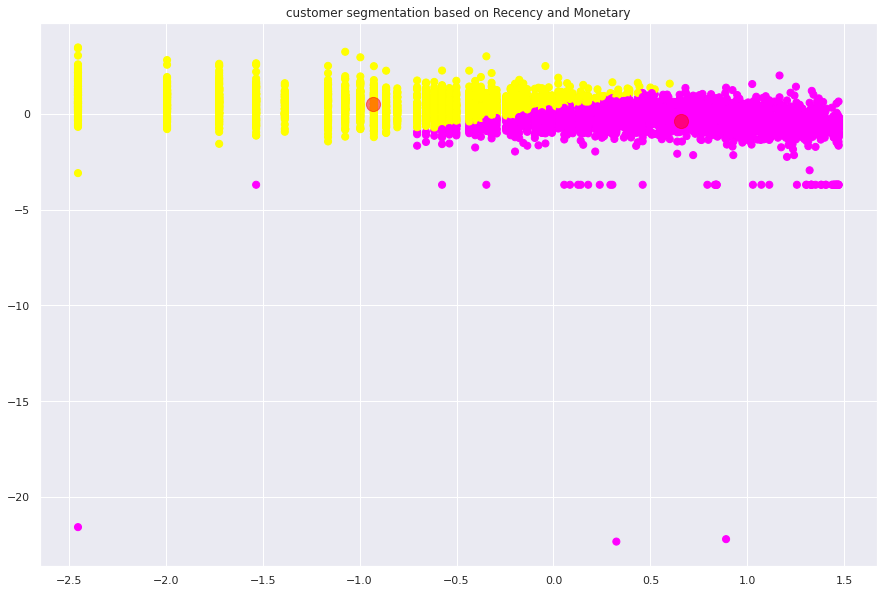

In [ ]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')
 
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

## we see that ,Customers are well separate when we cluster them by Recency and Monetary
## **Applying DBSCAN on Recency and Monetary**

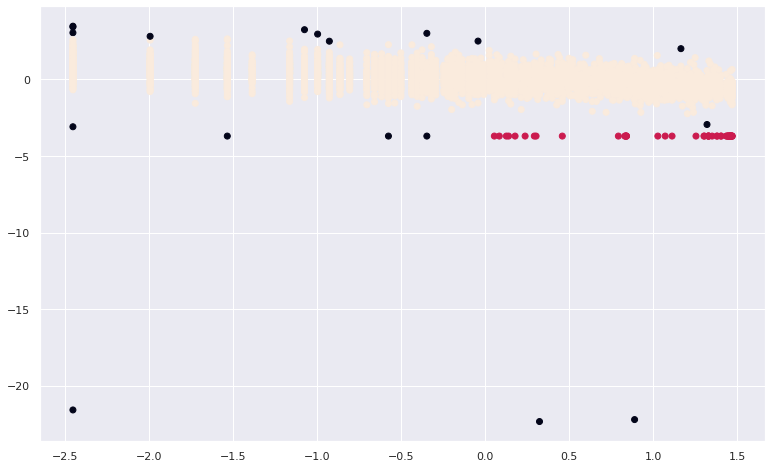

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

# we see that ,Customers are well separate when we cluster them by Recency and Monetary

## **Applying silhouette Score Method on Frquency and Monetary**

In [ ]:
features_fre_mon=['Frequency_log','Monetary_log']
X_features_fre_mon=rfm_df[features_fre_mon].values
scaler_fre_mon=preprocessing.StandardScaler()
X_fre_mon=scaler_fre_mon.fit_transform(X_features_fre_mon)
X=X_fre_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_
 
    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4692743621891894
For n_clusters = 3, silhouette score is 0.4737133595552943
For n_clusters = 4, silhouette score is 0.421666197616096
For n_clusters = 5, silhouette score is 0.38600344793255315
For n_clusters = 6, silhouette score is 0.38693230024884934
For n_clusters = 7, silhouette score is 0.3593073782223093
For n_clusters = 8, silhouette score is 0.34129997238707876
For n_clusters = 9, silhouette score is 0.32648177513215304
For n_clusters = 10, silhouette score is 0.36804629028867797
For n_clusters = 11, silhouette score is 0.3484437679202893
For n_clusters = 12, silhouette score is 0.34687080235766954
For n_clusters = 13, silhouette score is 0.34791470725771
For n_clusters = 14, silhouette score is 0.36484738908525705
For n_clusters = 15, silhouette score is 0.3440741144604458


# **Applying Elbow Method on Frequency and Monetary**

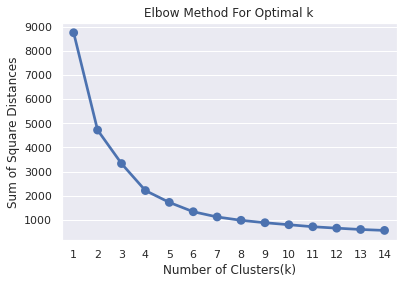

In [ ]:
from sklearn.cluster import KMeans
 
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

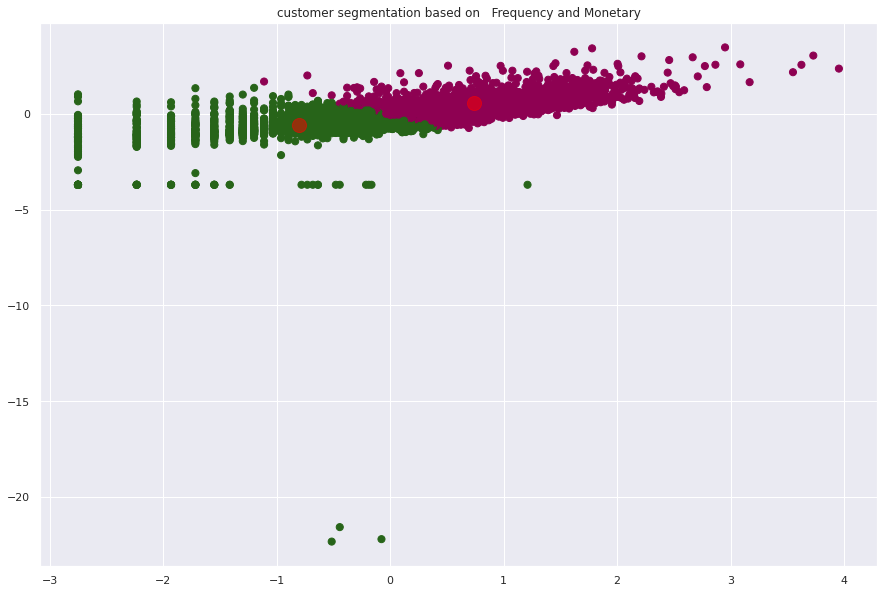

In [ ]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on   Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='PiYG')
 
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

### **we see that ,Customers are well separate when we cluster them by Frequency and Monetary**

# **Applying DBSCAN to Method on Frquency and Monetary**

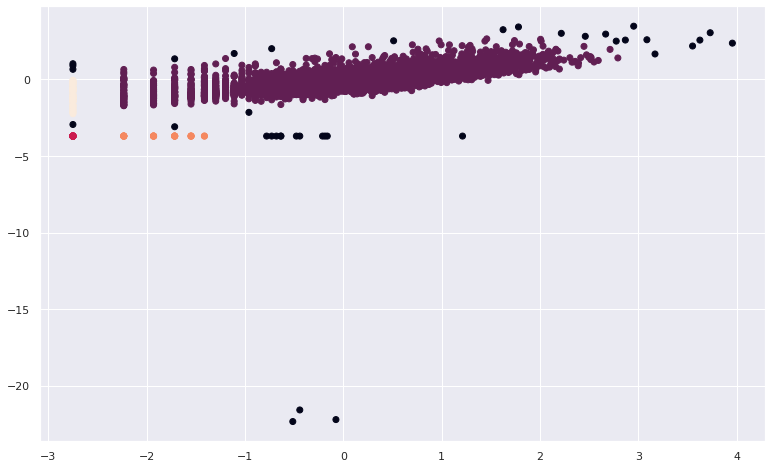

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

### **we see that ,Customers are well separate when we cluster them by Frequency and Monetary**

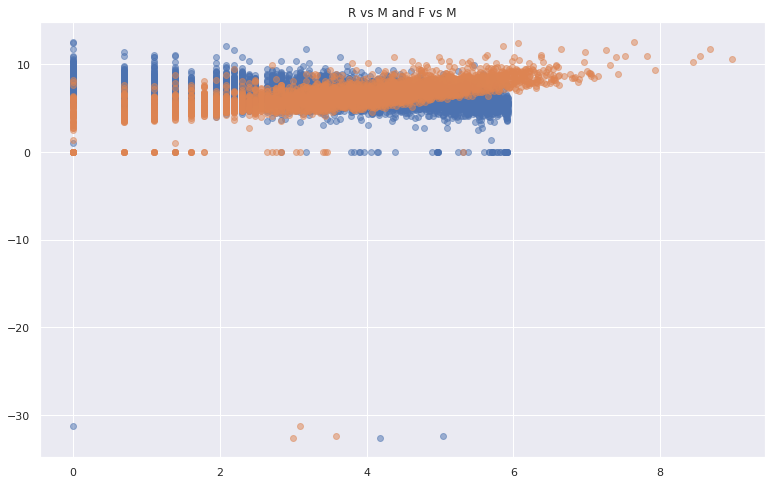

In [ ]:
plt.figure(figsize=(13,8))
plt.title('R vs M and F vs M')
plt.scatter(rfm_df.Recency_log,rfm_df.Monetary_log,alpha=0.5)
plt.scatter(rfm_df.Frequency_log,rfm_df.Monetary_log,alpha=0.5)

## **3D visualization of Recency ,Frequency and Monetary**

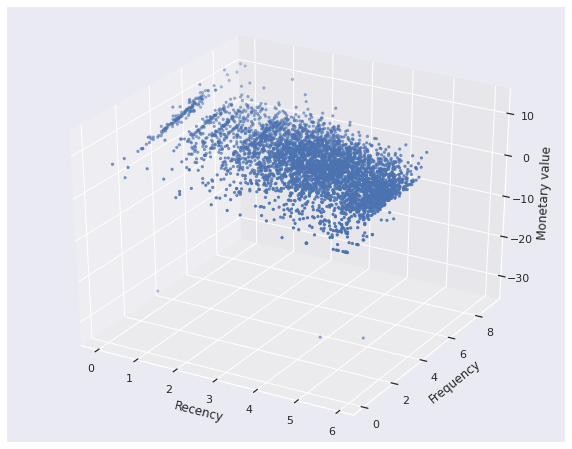

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(10,8))
plt.title('3d visualization of Recency Frequency and Monetary')
ax=fig.add_subplot(111,projection='3d')
xs=rfm_df.Recency_log
ys=rfm_df.Frequency_log
zs=rfm_df.Monetary_log
ax.scatter(xs,ys,zs,s=5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary value')
plt.show()

## **Applying Silhouette Method on Recency ,Frequency and Monetary**

In [ ]:
feature_vector=['Recency_log','Frequency_log','Monetary_log']
X_features=rfm_df[feature_vector].values
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X_features)

For n_clusters = 2 The average silhouette_score is : 0.38718060684993233


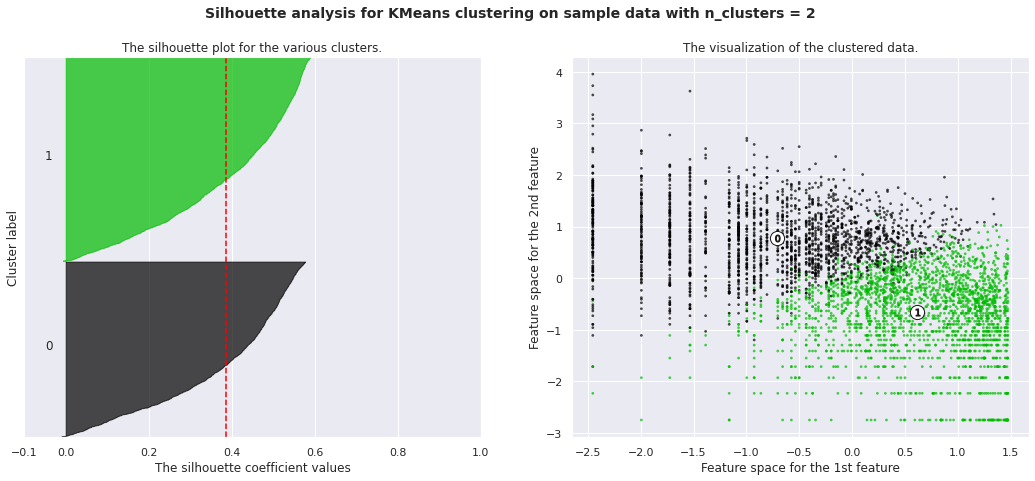

For n_clusters = 3 The average silhouette_score is : 0.29812339537113347


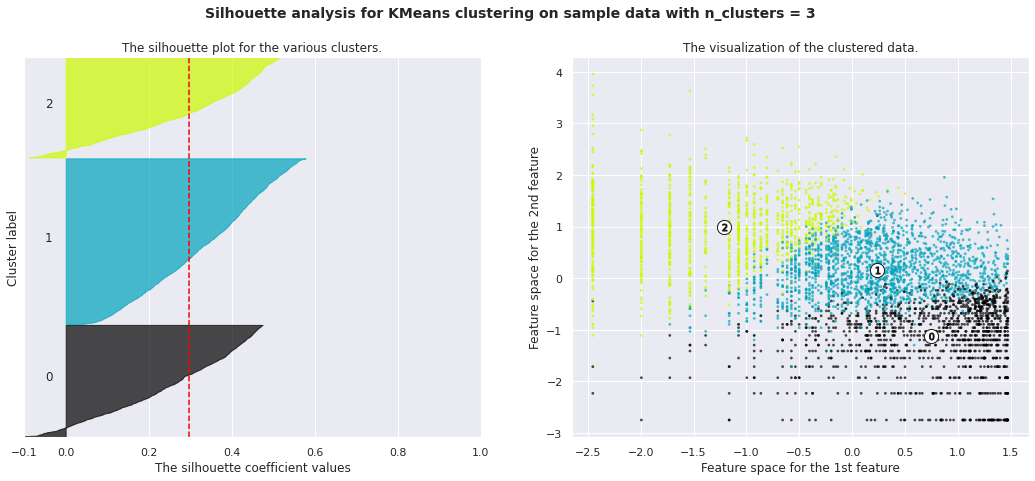

For n_clusters = 4 The average silhouette_score is : 0.30449889462697843


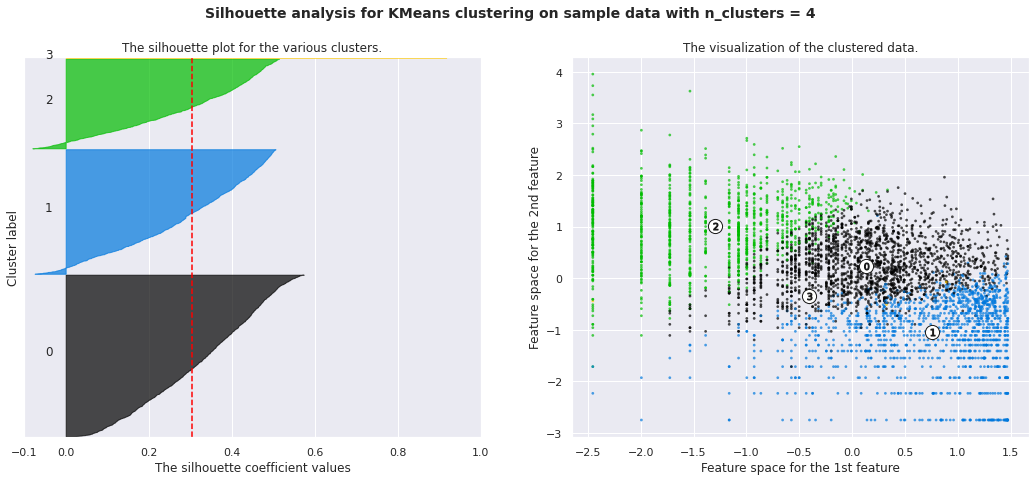

For n_clusters = 5 The average silhouette_score is : 0.29431908756432273


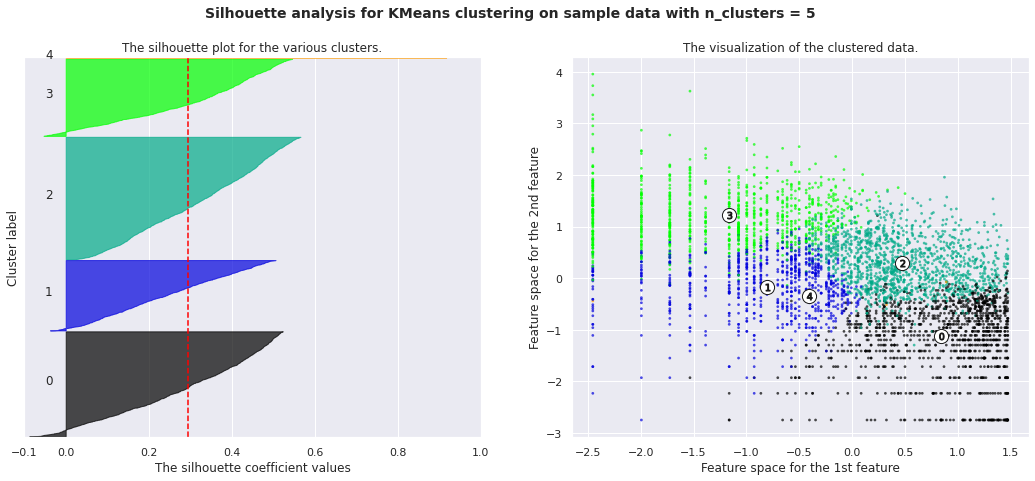

For n_clusters = 6 The average silhouette_score is : 0.2920521513322244


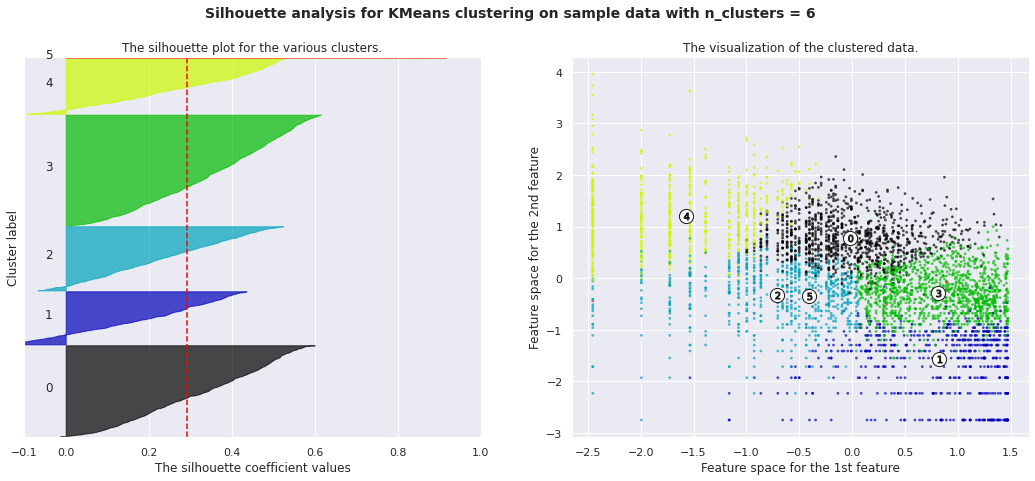

For n_clusters = 7 The average silhouette_score is : 0.2947027478945177


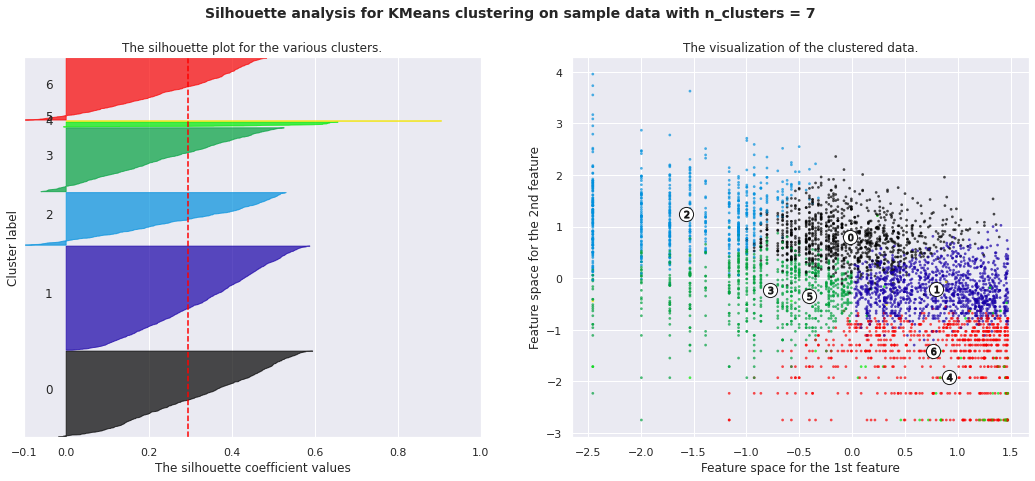

For n_clusters = 8 The average silhouette_score is : 0.29103374141591615


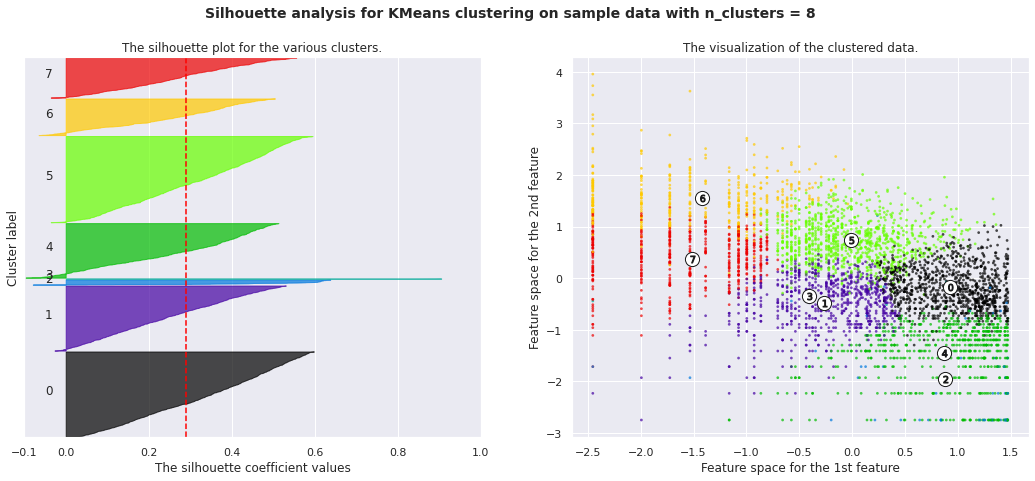

For n_clusters = 9 The average silhouette_score is : 0.28239577274694666


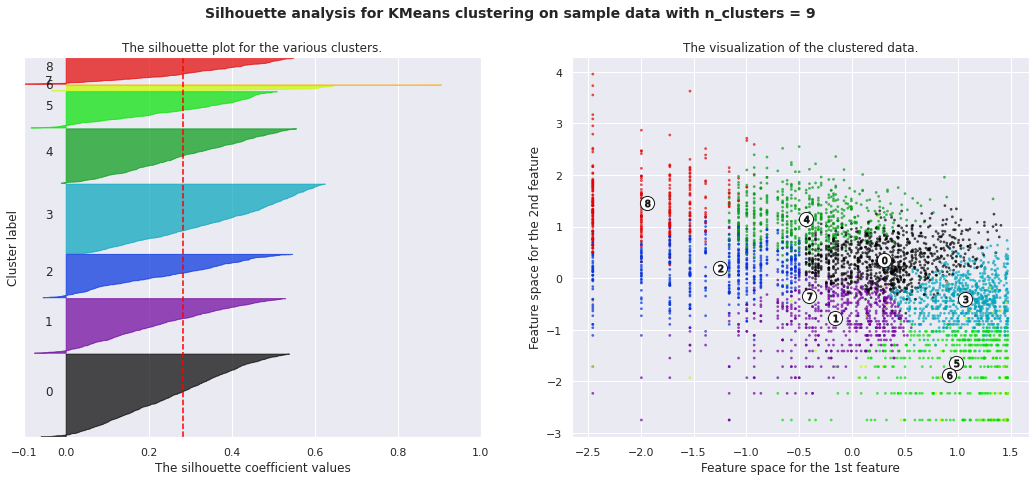

For n_clusters = 10 The average silhouette_score is : 0.2811198631570759


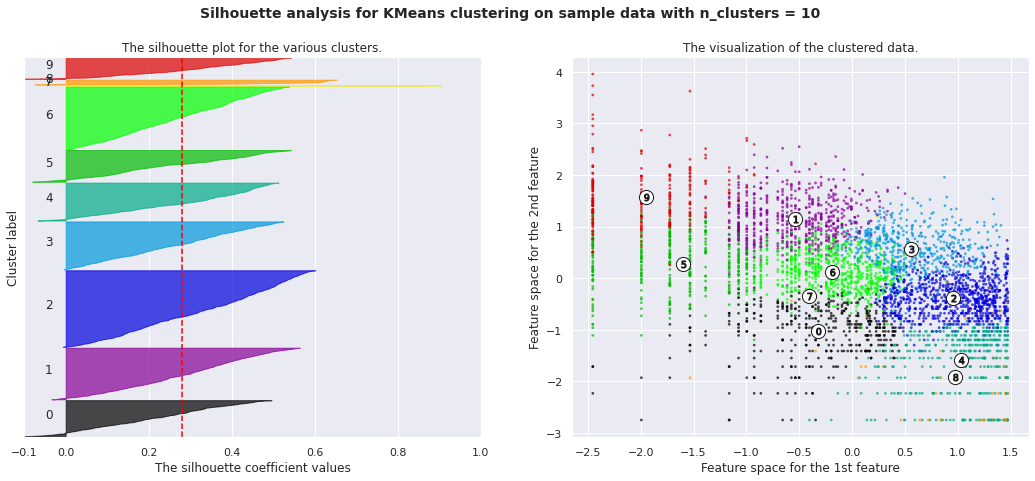

For n_clusters = 11 The average silhouette_score is : 0.28007642770019175


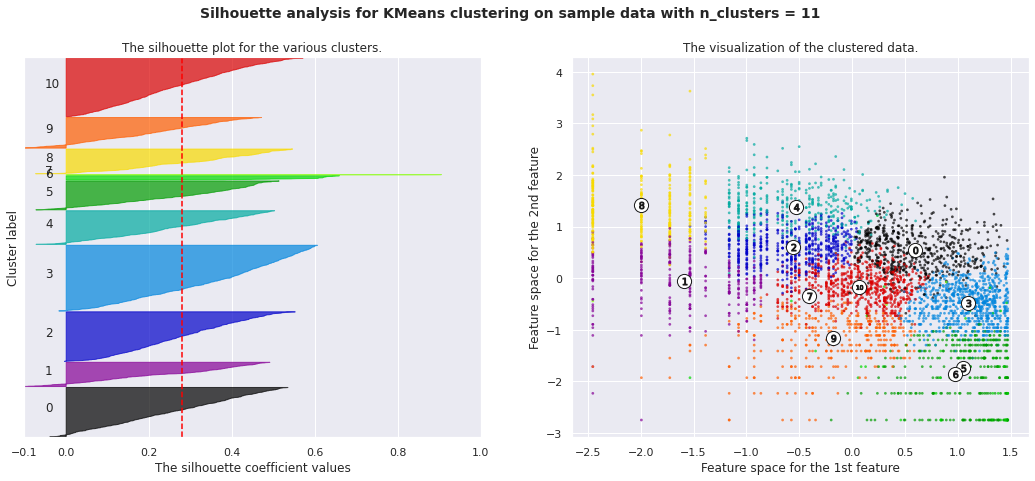

For n_clusters = 12 The average silhouette_score is : 0.2682665011260133


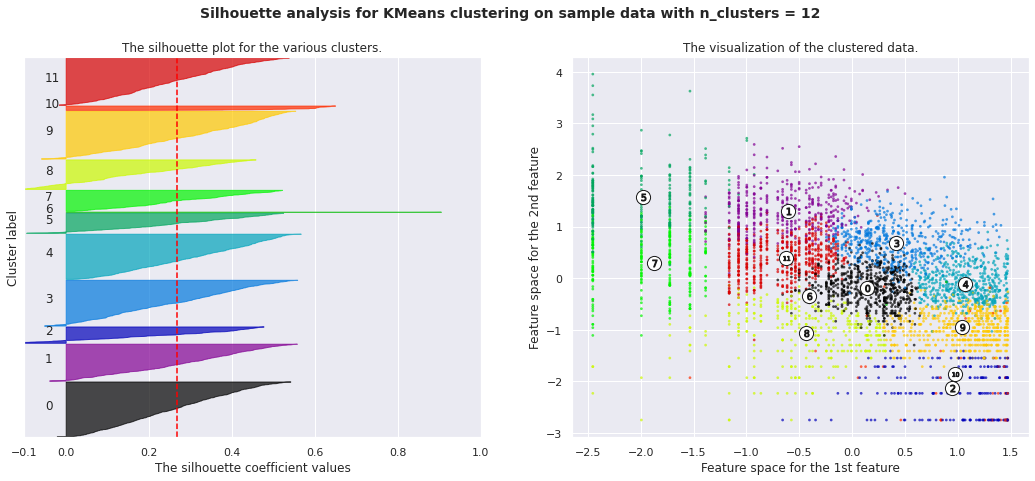

For n_clusters = 13 The average silhouette_score is : 0.2756347711948991


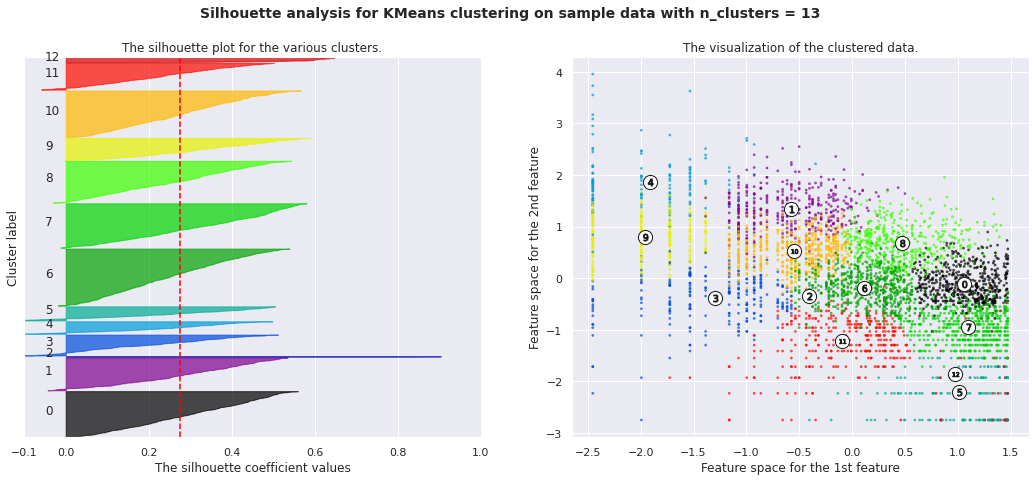

For n_clusters = 14 The average silhouette_score is : 0.2674216210413426


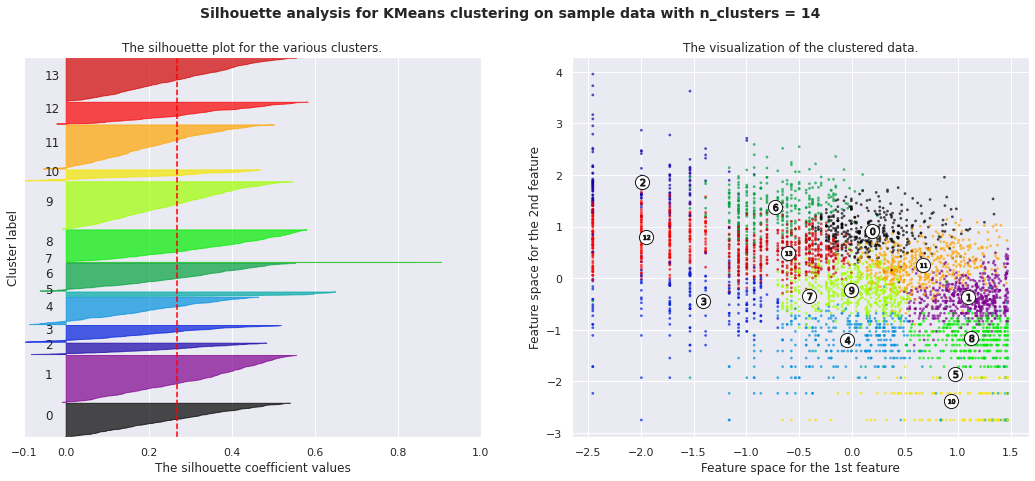

For n_clusters = 15 The average silhouette_score is : 0.26705951722969395


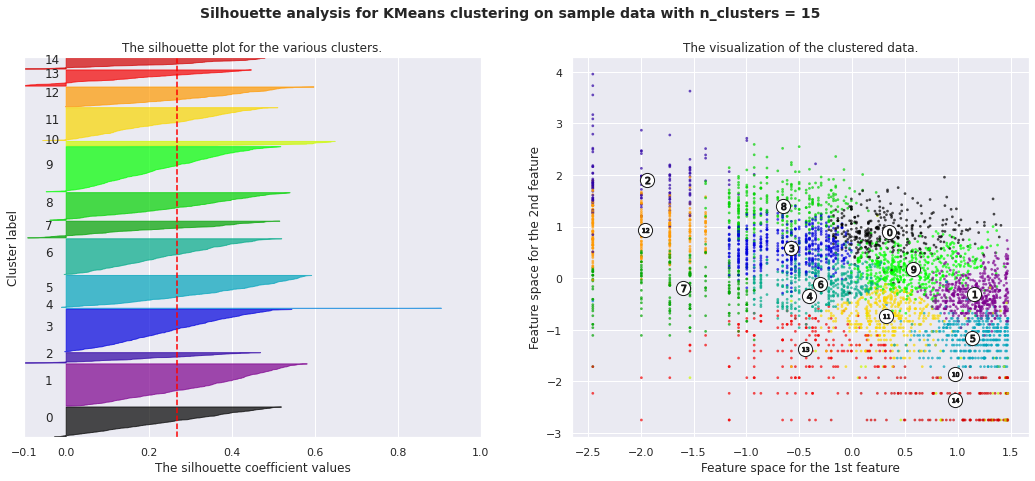

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
 
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
 
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
 
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
 
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
 
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
 
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
 
        ith_cluster_silhouette_values.sort()
 
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
 
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
 
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
 
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
 
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
 
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
 
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
 
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
       # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
 
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
 
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
 
    plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

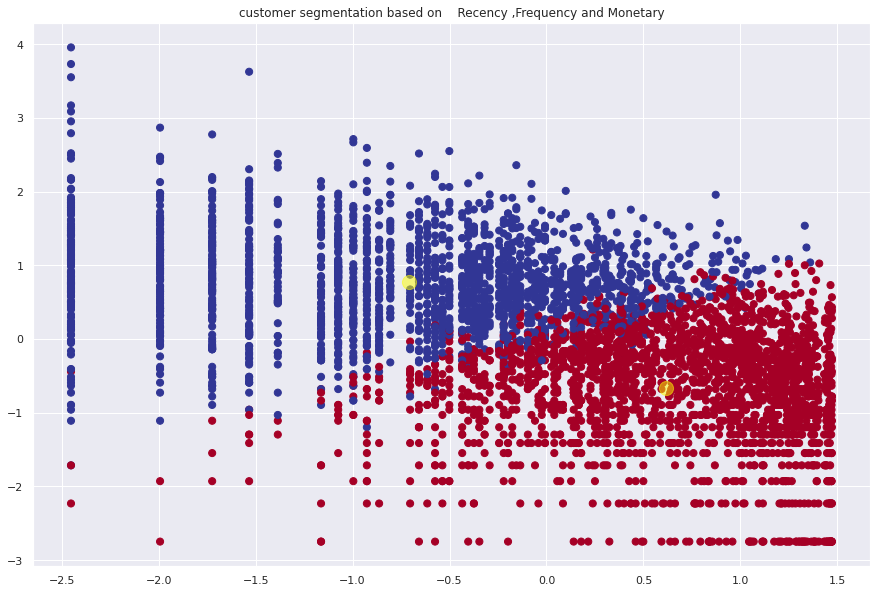

In [ ]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on    Recency ,Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='RdYlBu')
 
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5)

### **we see that ,Customers are well separate when we cluster them by Recency ,Frequency and Monetary**
# **Applying Elbow Method on Recency ,Frequency and Monetary**

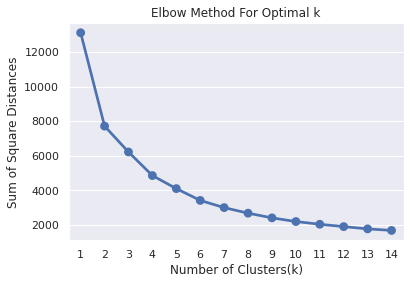

In [ ]:
from sklearn.cluster import KMeans
 
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)
 
#Find the clusters for the observation given in the dataset
rfm_df['Cluster'] = KMean_clust.labels_
rfm_df.head(10)

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore  \
CustomerID                                                             
12346.0         325          2      1.00  4  4  4      444        12   
12347.0           2        182   4310.00  1  1  1      111         3   
12348.0          75         31   1797.24  3  3  1      331         7   
12349.0          18         73   1757.55  2  2  1      221         5   
12350.0         310         17    334.40  4  4  3      443        11   
12352.0          36         95   1545.41  2  2  2      222         6   
12353.0         204          4     89.00  4  4  4      444        12   
12354.0         232         58   1079.40  4  2  2      422         8   
12355.0         214         13    459.40  4  4  3      443        11   
12356.0          22         59   2811.43  2  2  1      221         5   

            Recency_log  Frequency_log  Monetary_log  Cluster  
CustomerID                                                     
12346.0        5.783825       0.693147      0.000000        1  
12347.0        0.693147       5.204007      8.368693        0  
12348.0        4.317488       3.433987      7.494007        1  
12349.0        2.890372       4.290459      7.471676        0  
12350.0        5.736572       2.833213      5.812338        1  
12352.0        3.583519       4.553877      7.343045        0  
12353.0        5.318120       1.386294      4.488636        1  
12354.0        5.446737       4.060443      6.984161        1  
12355.0        5.365976       2.564949      6.129921        1  
12356.0        3.091042       4.077537      7.941449        0

# **Dendogram to find the optimal number of clusters**

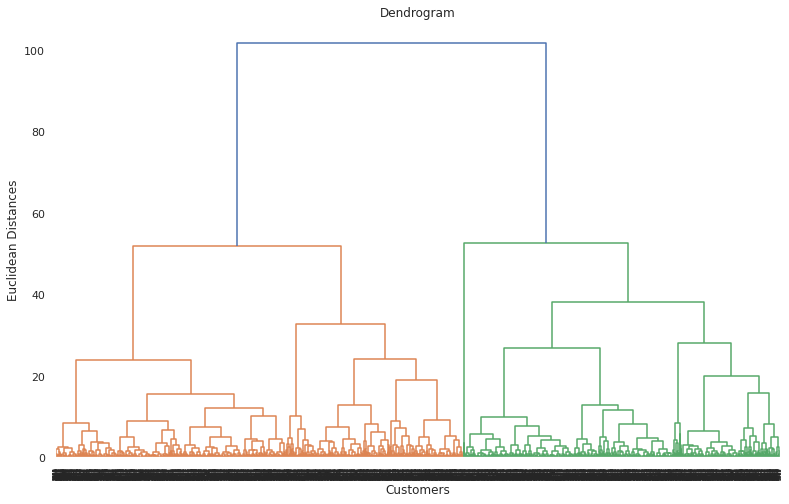

In [ ]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

## **The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold=90**

## No. of Cluster = 2

In [ ]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

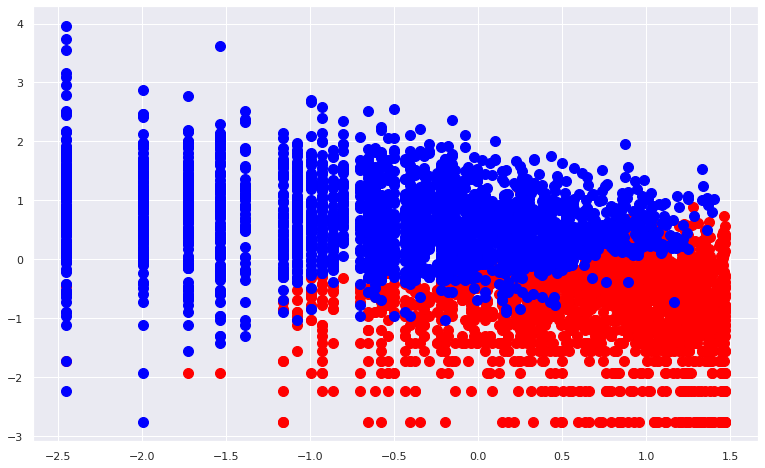

In [ ]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')
#plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')

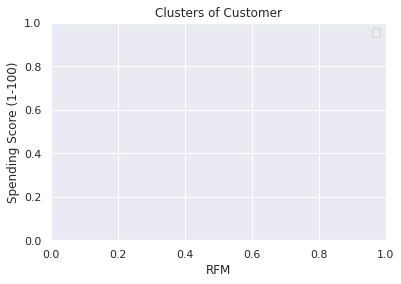

In [ ]:
plt.title('Clusters of Customer')
plt.xlabel('RFM')
 
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### **By applying different clustering algorithem to our dataset .we get the optimal number of cluster is equal to 2**

# **Applying DBSCAN to Recency ,Frequency and Monetary**

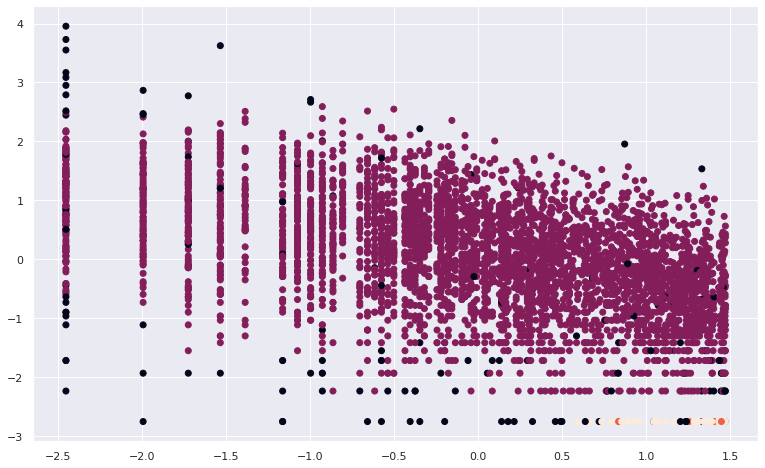

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

### **we see that ,Customers are well separate when we cluster them by Recency ,Frequency and Monetary and optimal number of cluster is equal to 3**

# **Summary**

In [ ]:
from prettytable import PrettyTable 
  
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(['SL No.',"Model_Name",'Data', "Optimal_Number_of_cluster"]) 
  
# Add rows 
myTable.add_row(['1',"K-Means with silhouette_score ", "RM", "2"]) 
myTable.add_row(['2',"K-Means with Elbow methos  ", "RM", "2"])
myTable.add_row(['3',"DBSCAN ", "RM", "2"]) 
myTable.add_row(['4',"K-Means with silhouette_score ", "FM", "2"]) 
myTable.add_row(['5',"K-Means with Elbow methos  ", "FM", "2"])
myTable.add_row(['6',"DBSCAN ", "FM", "2"])
 
myTable.add_row(['7',"K-Means with silhouette_score ", "RFM", "2"]) 
myTable.add_row(['8',"K-Means with Elbow methos  ", "RFM", "2"])
myTable.add_row(['9',"Hierarchical clustering  ", "RFM", "2"])
myTable.add_row(['10',"DBSCAN ", "RFM", "3"])
print(myTable)

+--------+--------------------------------+------+---------------------------+
| SL No. |           Model_Name           | Data | Optimal_Number_of_cluster |
+--------+--------------------------------+------+---------------------------+
|   1    | K-Means with silhouette_score  |  RM  |             2             |
|   2    |  K-Means with Elbow methos     |  RM  |             2             |
|   3    |            DBSCAN              |  RM  |             2             |
|   4    | K-Means with silhouette_score  |  FM  |             2             |
|   5    |  K-Means with Elbow methos     |  FM  |             2             |
|   6    |            DBSCAN              |  FM  |             2             |
|   7    | K-Means with silhouette_score  | RFM  |             2             |
|   8    |  K-Means with Elbow methos     | RFM  |             2             |
|   9    |   Hierarchical clustering      | RFM  |             2             |
|   10   |            DBSCAN              | RFM  |  

# **Conclusion**
### **K-Mean Clustering**


*   Customers with Cluster Id 0 are the customers with high amount of transactions as compared to other customers.
*   Customers with Cluster Id 2 are frequent buyers.
*   Customers with Cluster Id 1 are not recent buyers and hence least of importance from business point of view.

